In [5]:
%matplotlib notebook
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

import numpy as np
import importlib
import integralclient as ic
importlib.reload(ic)
ic.__file__

from collections import defaultdict
import glob
from astropy.wcs import WCS

import astropy.io.fits as fits
from astropy import units as u
from astropy import constants as const

import importlib
import integralclient as ic
import numpy as np

import hashlib

hashstring = lambda x:hashlib.sha224(x.encode()).hexdigest()[:8]


import matplotlib.font_manager as font_manager

2020-06-03 10:36:19 savchenk-Aspire-VN7-793G root[8465] INFO selecting timesystem endpoint https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/


In [6]:
import matplotlib.patches as patches

In [12]:
import ddaclient

In [13]:
import yaml

bursts = yaml.load(open("draft/PAPER_SGR1935_INTEGRAL/data/burst-search/bursts.yaml"))

#for b in bursts[]

/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:

sgr1935_distance = 9.1*u.kpc
sgr1806_distance = 12.*u.kpc
frb121102_distance = 149.*u.Mpc



In [15]:
#Scholtz 2020 


#Burst No.	Barycentric	Peak Flux Density	Fluence	Gaussian FWHM	X-Ray Fluence Limit^b	
#Arrival Time^a	(Jy)	(Jy ms)	(ms)	(10^-10 erg cm^-2)	

frb121102_bursts = []

for r in """GBT 1	57647.232346450619	0.36	0.82	2.16 +or- 0.06	2	
GBT 2	57647.232346883015	0.08	0.16	1.94 +or- 0.25	2	
GBT 3	57649.173812898174	0.36	1.32	3.45 +or- 0.07	2	
GBT 4	57649.218213226581	0.29	0.34	0.88 +or- 0.07	2	
GBT 5	57765.049526345771	0.17	0.33	1.40 +or- 0.09	5	
GBT 6	57765.064793212950	0.38	0.83	1.79 +or- 0.04	5	
GBT 7	57765.069047502300	0.20	0.62	2.97 +or- 0.12	5	
GBT 8^c	57765.100827859293	0.09	0.18	2.46 +or- 0.28	5	
GBT 9^c	57765.120778204779	0.56	1.08	1.36 +or- 0.03	5	
GBT 10	57765.136498608757	0.11	0.22	1.68 +or- 0.17	5	
AO 1^c	57765.100827849608	0.09	0.37	4.29 +or- 0.11	5	
AO 2	57765.108680842022	0.02	0.03	3.69 +or- 0.57	5	
AO 3^c	57765.120778202479	0.02	0.05	4.34 +or- 0.44	5	
AO 4	57765.143337535257	0.03	0.10	3.66 +or- 0.32	5	""".split("\n"):
    print(r.split())
    
    frb121102_bursts.append(dict(
        energy_radio=u.GHz,
        fluence_radio=[float(r.split()[4])*u.Jy*u.ms*u.GHz, float(r.split()[4])*u.Jy*u.ms*u.GHz, float(r.split()[4])*u.Jy*u.ms*u.GHz],
        energy_xray=np.array([3, 0.5, 10])*u.keV,
        fluence_xray=[float(r.split()[8])*1e-10*u.erg/u.cm**2, float(r.split()[8])*1e-10*u.erg/u.cm**2, float(r.split()[8])*1e-10*u.erg/u.cm**2],
    ))
    
frb121102_bursts

['GBT', '1', '57647.232346450619', '0.36', '0.82', '2.16', '+or-', '0.06', '2']
['GBT', '2', '57647.232346883015', '0.08', '0.16', '1.94', '+or-', '0.25', '2']
['GBT', '3', '57649.173812898174', '0.36', '1.32', '3.45', '+or-', '0.07', '2']
['GBT', '4', '57649.218213226581', '0.29', '0.34', '0.88', '+or-', '0.07', '2']
['GBT', '5', '57765.049526345771', '0.17', '0.33', '1.40', '+or-', '0.09', '5']
['GBT', '6', '57765.064793212950', '0.38', '0.83', '1.79', '+or-', '0.04', '5']
['GBT', '7', '57765.069047502300', '0.20', '0.62', '2.97', '+or-', '0.12', '5']
['GBT', '8^c', '57765.100827859293', '0.09', '0.18', '2.46', '+or-', '0.28', '5']
['GBT', '9^c', '57765.120778204779', '0.56', '1.08', '1.36', '+or-', '0.03', '5']
['GBT', '10', '57765.136498608757', '0.11', '0.22', '1.68', '+or-', '0.17', '5']
['AO', '1^c', '57765.100827849608', '0.09', '0.37', '4.29', '+or-', '0.11', '5']
['AO', '2', '57765.108680842022', '0.02', '0.03', '3.69', '+or-', '0.57', '5']
['AO', '3^c', '57765.120778202479',

[{'energy_radio': Unit("GHz"),
  'fluence_radio': [<Quantity 0.82 GHz Jy ms>,
   <Quantity 0.82 GHz Jy ms>,
   <Quantity 0.82 GHz Jy ms>],
  'energy_xray': <Quantity [ 3. ,  0.5, 10. ] keV>,
  'fluence_xray': [<Quantity 2.e-10 erg / cm2>,
   <Quantity 2.e-10 erg / cm2>,
   <Quantity 2.e-10 erg / cm2>]},
 {'energy_radio': Unit("GHz"),
  'fluence_radio': [<Quantity 0.16 GHz Jy ms>,
   <Quantity 0.16 GHz Jy ms>,
   <Quantity 0.16 GHz Jy ms>],
  'energy_xray': <Quantity [ 3. ,  0.5, 10. ] keV>,
  'fluence_xray': [<Quantity 2.e-10 erg / cm2>,
   <Quantity 2.e-10 erg / cm2>,
   <Quantity 2.e-10 erg / cm2>]},
 {'energy_radio': Unit("GHz"),
  'fluence_radio': [<Quantity 1.32 GHz Jy ms>,
   <Quantity 1.32 GHz Jy ms>,
   <Quantity 1.32 GHz Jy ms>],
  'energy_xray': <Quantity [ 3. ,  0.5, 10. ] keV>,
  'fluence_xray': [<Quantity 2.e-10 erg / cm2>,
   <Quantity 2.e-10 erg / cm2>,
   <Quantity 2.e-10 erg / cm2>]},
 {'energy_radio': Unit("GHz"),
  'fluence_radio': [<Quantity 0.34 GHz Jy ms>,
   <Qua

In [16]:
from ddpaper.filters import setup_custom_filters
class Ob:
    filters={}
ob=Ob()
setup_custom_filters(ob)

latex_exp=ob.filters['latex_exp']

latex_exp(1e-3)

XX 0.001 XX
YYY:: 1 1
10$^{-3}$


'10$^{-3}$'

In [92]:
import re

# FAST during GBM
# https://arxiv.org/pdf/2005.11479v2.pdf

r="""
1&00:19:44.192&1.22$_{-0.16}^{+0.18} \times 10^{-6}$&7.93$_{-1.05}^{+1.20} \times 10^{-8}$\\%
2&00:23:04.728&3.26$_{-0.67}^{+0.73} \times 10^{-7}$&7.10$_{-1.47}^{+1.58} \times 10^{-8}$\\%
3&00:24:30.296&2.37$_{-0.05}^{+0.05} \times 10^{-5}$&3.01$_{-0.07}^{+0.06} \times 10^{-6}$\\%
4&00:25:43.945&1.99$_{-0.62}^{+0.70} \times 10^{-7}$&5.26$_{-1.64}^{+1.84} \times 10^{-8}$\\%
5&00:37:36.153&2.73$_{-0.55}^{+0.58} \times 10^{-7}$&6.78$_{-1.35}^{+1.43} \times 10^{-8}$\\%
6&00:39:39.513&8.96$_{-1.04}^{+1.09} \times 10^{-7}$&1.89$_{-0.22}^{+0.23} \times 10^{-7}$\\%
7&00:40:33.072&1.20$_{-0.11}^{+0.11} \times 10^{-6}$&3.57$_{-0.33}^{+0.32} \times 10^{-7}$\\%
8&00:41:32.136&4.69$_{-0.17}^{+0.16} \times 10^{-6}$&1.15$_{-0.04}^{+0.04} \times 10^{-6}$\\%
9&00:43:25.169&2.23$_{-0.13}^{+0.14} \times 10^{-6}$&5.51$_{-0.33}^{+0.35} \times 10^{-7}$\\%
10&00:44:08.202&3.93$_{-0.07}^{+0.08} \times 10^{-5}$&6.68$_{-0.13}^{+0.13} \times 10^{-6}$\\%
11&00:45:31.097&8.44$_{-1.16}^{+1.32} \times 10^{-7}$&7.43$_{-1.02}^{+1.16} \times 10^{-8}$\\%
12&00:46:00.009&7.83$_{-0.67}^{+0.66} \times 10^{-7}$&4.52$_{-0.39}^{+0.38} \times 10^{-7}$\\%
13&00:46:06.408&4.11$_{-0.61}^{+0.64} \times 10^{-7}$&7.89$_{-1.17}^{+1.23} \times 10^{-8}$\\%
14&00:46:20.176&2.32$_{-0.05}^{+0.06} \times 10^{-5}$&4.18$_{-0.09}^{+0.10} \times 10^{-6}$\\%
15&00:46:23.504&3.17$_{-0.43}^{+0.46} \times 10^{-7}$&2.32$_{-0.31}^{+0.33} \times 10^{-7}$\\%
16&00:46:43.208&9.81$_{-0.69}^{+0.75} \times 10^{-7}$&3.21$_{-0.23}^{+0.24} \times 10^{-7}$\\%
17&00:47:24.961&1.66$_{-0.34}^{+0.43} \times 10^{-7}$&6.23$_{-1.29}^{+1.61} \times 10^{-8}$\\%
18&00:47:57.528&1.16$_{-0.11}^{+0.12} \times 10^{-6}$&1.08$_{-0.10}^{+0.11} \times 10^{-7}$\\%
19&00:48:44.824&3.96$_{-0.42}^{+0.46} \times 10^{-7}$&1.38$_{-0.15}^{+0.16} \times 10^{-7}$\\%
20&00:48:49.272&3.05$_{-0.16}^{+0.17} \times 10^{-6}$&7.32$_{-0.38}^{+0.40} \times 10^{-7}$\\%
21&00:49:00.273&7.80$_{-1.03}^{+1.14} \times 10^{-7}$&8.11$_{-1.07}^{+1.18} \times 10^{-8}$\\%
22&00:49:01.121&8.36$_{-0.92}^{+0.96} \times 10^{-7}$&1.32$_{-0.14}^{+0.15} \times 10^{-7}$\\%
23&00:49:06.472&9.66$_{-3.73}^{+4.00} \times 10^{-8}$&6.98$_{-2.69}^{+2.89} \times 10^{-8}$\\%
24&00:49:16.592&1.78$_{-0.15}^{+0.16} \times 10^{-7}$&4.17$_{-1.24}^{+1.28} \times 10^{-8}$\\%
25&00:49:22.392&7.72$_{-1.05}^{+1.10} \times 10^{-7}$&4.55$_{-0.62}^{+0.65} \times 10^{-8}$\\%
26&00:49:27.280&3.58$_{-1.08}^{+1.32} \times 10^{-7}$&2.11$_{-0.64}^{+0.78} \times 10^{-8}$\\%
27&00:49:46.680&3.87$_{-0.36}^{+0.39} \times 10^{-7}$&2.63$_{-0.24}^{+0.26} \times 10^{-7}$\\%
28&00:50:01.248&7.83$_{-0.61}^{+0.66} \times 10^{-7}$&3.13$_{-0.25}^{+0.26} \times 10^{-7}$\\%
29&00:50:21.969&1.32$_{-0.46}^{+0.55} \times 10^{-7}$&1.85$_{-0.65}^{+0.76} \times 10^{-8}$\\%
"""


#re.findall(r'&([\d\.]*?)\$_\{([\d\.]*?)\}^\{([\d\.]*?)\} \\times 10\^\{-(\d)\}\$\\\\%', r)
#re.findall(r'\^\{([\+\-\d\.]+?)\} \times 10\^\{(\-\d)\}', r)



frb_fast_lim_common = (40*u.mJy*u.ms*u.GHz)

frb_fast_lim = []
sgr_fast_gbm = []

for x in re.findall(r'([\d\.]+?)\$_\{([\+\-\d\.]+?)\}\^\{([\+\-\d\.]+?)\} \times 10\^\{(\-\d)\}\$\\', r):
    f, fem, fep, sc = map(float, x)
    sgr_fast_gbm.append(dict(
        energy_radio=np.array([1.25, 1.0, 1.5])*u.GHz,
        fluence_radio=[frb_fast_lim_common, frb_fast_lim_common, frb_fast_lim_common],
        energy_xray=np.array([(8*200)**0.5, 8, 200])*u.keV,
        fluence_xray=[
            f*10**sc*u.erg/u.cm**2, 
            (f-fem)*10**sc*u.erg/u.cm**2, 
            (f+fep)*10**sc*u.erg/u.cm**2, 
        ],
    ))
    
sgr_fast_gbm

[{'energy_radio': <Quantity [1.25, 1.  , 1.5 ] GHz>,
  'fluence_radio': [<Quantity 40. GHz mJy ms>,
   <Quantity 40. GHz mJy ms>,
   <Quantity 40. GHz mJy ms>],
  'energy_xray': <Quantity [ 40.,   8., 200.] keV>,
  'fluence_xray': [<Quantity 7.93e-08 erg / cm2>,
   <Quantity 8.98e-08 erg / cm2>,
   <Quantity 9.13e-08 erg / cm2>]},
 {'energy_radio': <Quantity [1.25, 1.  , 1.5 ] GHz>,
  'fluence_radio': [<Quantity 40. GHz mJy ms>,
   <Quantity 40. GHz mJy ms>,
   <Quantity 40. GHz mJy ms>],
  'energy_xray': <Quantity [ 40.,   8., 200.] keV>,
  'fluence_xray': [<Quantity 7.1e-08 erg / cm2>,
   <Quantity 8.57e-08 erg / cm2>,
   <Quantity 8.68e-08 erg / cm2>]},
 {'energy_radio': <Quantity [1.25, 1.  , 1.5 ] GHz>,
  'fluence_radio': [<Quantity 40. GHz mJy ms>,
   <Quantity 40. GHz mJy ms>,
   <Quantity 40. GHz mJy ms>],
  'energy_xray': <Quantity [ 40.,   8., 200.] keV>,
  'fluence_xray': [<Quantity 3.01e-06 erg / cm2>,
   <Quantity 3.08e-06 erg / cm2>,
   <Quantity 3.07e-06 erg / cm2>]},
 {

<IPython.core.display.Javascript object>


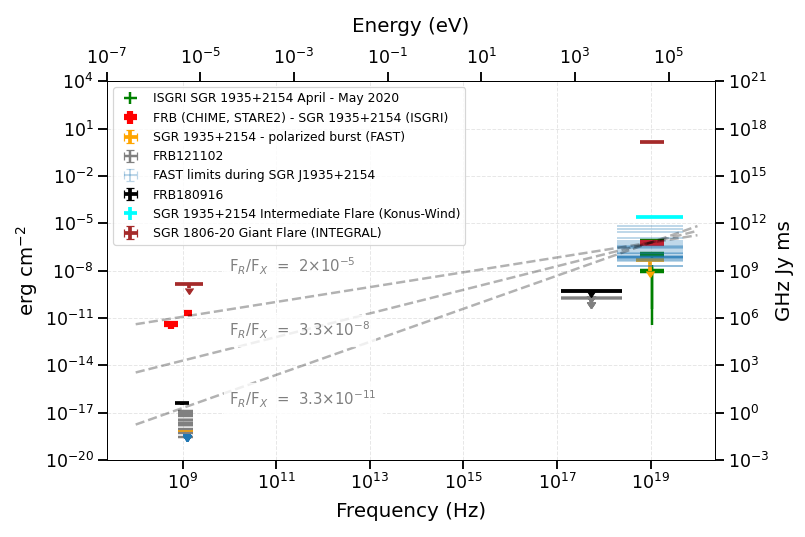

[1.10670901e-07 8.78224992e-08 1.33519302e-07] erg / cm2
[8.90410414e-08 6.64478294e-08 1.11634253e-07] erg / cm2
[1.27853906e-07 1.11691693e-07 1.44016119e-07] erg / cm2
[9.68550446e-08 8.05762159e-08 1.13133873e-07] erg / cm2
[1.10131962e-08 3.85729295e-11 2.19878195e-08] erg / cm2
[1.11178347e-07 8.74737146e-08 1.34882979e-07] erg / cm2
[5.87082920e-07 5.65428817e-07 6.08737023e-07] erg / cm2
[8.84281605e-09 3.43692405e-12 1.76821952e-08] erg / cm2
[9.13125945e-07 8.01356788e-07 1.02489510e-06] erg / cm2
XX 2e-05 XX
YYY:: 2.0 2
2$\times$10$^{-5}$
XX 3.3333333333333334e-08 XX
YYY:: 3.3333333333333335 3.3
3.3$\times$10$^{-8}$
XX 3.3333333333333335e-11 XX
YYY:: 3.3333333333333335 3.3
3.3$\times$10$^{-11}$


/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


In [101]:
f,ax1=plt.subplots(1,1, figsize=(9,6))

ax1.grid(True, alpha=0.3, ls="--")

font_prop = font_manager.FontProperties(size=16)
font_prop14 = font_manager.FontProperties(size=14)


sgr1935_distance = 9.1*u.kpc

## ISGRI bursts

i_bursts=[]
for b in bursts:
    if 'fit' not in b:
        continue
        
    flux = np.array(b['fit']['flux'])*u.erg/u.cm**2/u.s
    
    
    flux[0] = (flux[1] + flux[2])/2.
    
    fluence = b['bblocks']['length_s']*u.s * flux
    
    if fluence[0] < 1e-9*u.erg/u.cm**2:
        continue
    
    #Eiso = 
    
    print(fluence)
    
    i_bursts.append(dict(fluence=fluence, flux=flux, energy=np.array([40, 25, 80])*u.keV, utc=b['utc_integral']))
    
    ib = i_bursts[-1]
    ib['eiso'] = 4*np.pi*sgr1935_distance**2*ib['fluence']
    
i_bursts[0]['lw'] = 2
i_bursts[0]['color'] = 'green'
i_bursts[0]['label'] = "ISGRI SGR 1935+2154 April - May 2020"

def plot_on_sed_eiso(_ax, values, label, **kwargs):
    _ax.errorbar(
        [ (i['energy'][0]/const.h).to(u.Hz).value for i in values ],
        [ i['eiso'][0].to(u.erg).value for i in values ],
        xerr = (
            [ ((i['energy'][0]-i['energy'][1])/const.h).to(u.Hz).value for i in values ],
            [ ((i['energy'][2]-i['energy'][0])/const.h).to(u.Hz).value for i in values ],
        ),
        yerr=(        
            [ (i['eiso'][0] - i['eiso'][1]).to(u.erg).value for i in values ],
            [ (i['eiso'][2] - i['eiso'][0]).to(u.erg).value for i in values ]
        ),
        ls="",
        label=label,
        **kwargs
    )
    
def plot_on_sed_fluence(_ax, values, label=None, **kwargs):
    _ax.errorbar(
        #[ (i['energy'][0]/const.h).to(u.Hz).value for i in values ],
        [ ((i['energy'][1]*i['energy'][2])**0.5/const.h).to(u.Hz).value for i in values ],
        [ i['fluence'][0].to(u.erg/u.cm**2).value for i in values ],
        xerr = (
            [ (((i['energy'][1]*i['energy'][2])**0.5-i['energy'][1])/const.h).to(u.Hz).value for i in values ],
            [ ((i['energy'][2]-(i['energy'][1]*i['energy'][2])**0.5)/const.h).to(u.Hz).value for i in values ],
        ),
        yerr=(        
            [ (i['fluence'][0] - i['fluence'][1]).to(u.erg/u.cm**2).value for i in values ],
            [ (i['fluence'][2] - i['fluence'][0]).to(u.erg/u.cm**2).value for i in values ]
        ),
        uplims = [ i.get('uplim', False) for i in values ],
        ls="",
        linewidth=values[0].get('lw', None),
        c=values[0].get('color', None),
        label=values[0].get('label', label),
        **kwargs
    )

plot_on_sed = plot_on_sed_fluence
yaxis = "erg cm$^{-2}$"
#yaxis = "erg"
    
plot_on_sed(ax1, i_bursts)

## FRB-ISGRI
    
frb_isgri = [i for i in i_bursts if '14:34' in i['utc']]

# CHIME
# CHIME give a fluence of 700 kJy ms (sum of the two pulses) and they give also radio up. limits for other bursts
# https://arxiv.org/abs/2005.10324

frb_isgri.append(dict(
    energy = (np.array((0.6, 0.4, 0.8))* u.GHz ) * const.h,
    fluence = np.array((700,350,700))*u.kJy*u.ms * u.GHz*0.6,
))

frb_isgri[-1]['eiso'] = frb_isgri[-1]['fluence']*sgr1935_distance**2*4*np.pi

#STARE2
#STARE give 1.5+/-0.3  MJy ms
# https://arxiv.org/abs/2005.10828

    
frb_isgri.append(dict(
    energy = (np.array((1.3, 1.1, 1.6))* u.GHz ) * const.h,
    #energy = (np.array((1.3, 1.28, 1.48))* u.GHz ) * const.h,
    fluence = np.array((1.5,1.2,1.8))*u.MJy*u.ms * u.GHz*1.3
))
    
frb_isgri[-1]['eiso'] = frb_isgri[-1]['fluence']*sgr1935_distance**2*4*np.pi

frb_isgri[0]['lw'] = 5
frb_isgri[0]['color'] = 'red'
frb_isgri[0]['label'] = "FRB (CHIME, STARE2) - SGR 1935+2154 (ISGRI)"

    
plot_on_sed(ax1, frb_isgri)


## FAST

fast_isgri=[]
fast_isgri.append(dict(
    energy = (np.array((1.25, 1.25-0.46, 1.25+0.46))* u.GHz ) * const.h,
    fluence = np.array((60,60,60))*u.mJy*u.ms * u.GHz*1.25,
    uplim=False,
    lw=3,
    color='orange',
    label="SGR 1935+2154 - polarized burst (FAST)",
))
fast_isgri[-1]['eiso'] = fast_isgri[-1]['fluence']*sgr1935_distance**2*4*np.pi

fast_isgri.append(
     dict(energy=np.array((30,20,80))*u.keV, 
          fluence=np.array((4.8, 1., 4.8))*1e-8*u.erg/u.cm**2,
          uplim=True,
         )
)
fast_isgri[-1]['eiso'] = fast_isgri[-1]['fluence']*sgr1935_distance**2*4*np.pi



plot_on_sed(ax1, fast_isgri, lw=3)

### FRBs

frbs=[]


frbs.append(dict(
    energy = (np.array((1.25, 1.25-0.46, 1.25+0.46))* u.GHz ) * const.h,
    fluence = np.array((1,1,1))*u.mJy*u.ms * u.GHz*1.25    
))
frbs.append(dict(
    energy = (np.array((1.25, 1.25-0.46, 1.25+0.46))* u.GHz ) * const.h,
    fluence = np.array((1000,1000,1000))*u.mJy*u.ms * u.GHz*1.25    
))

frbs.append(dict(
    energy = (np.array((1.25, 1.25-0.46, 1.25+0.46))* u.GHz ) * const.h,
    fluence = np.array((1.5, 1., 1.5))*1e-7*u.erg/u.cm**2 ,
))

for f in frbs:
    f['eiso'] = f['fluence']*sgr1935_distance**2*4*np.pi


### Repeating FRB121102

frb121102_points=[]

for f in frb121102_bursts:
    frb121102_points.append(dict(
            energy = (np.array((1.25, 1.25-0.46, 1.25+0.46))* u.GHz ) * const.h,
            fluence = f['fluence_radio'],
        ))
    
    frb121102_points.append(dict(
            energy = f['energy_xray'],
            fluence = [f['fluence_xray'][0], f['fluence_xray'][0]*0.5, f['fluence_xray'][0]],
            uplim=True,
        ))
    
frb121102_points[0]['lw']=2
frb121102_points[0]['color']='grey'
    #frb121102_points[-1]['eiso'] = frb121102_points[-1]['fluence']*frb121102_distance**2*4*np.pi

plot_on_sed(ax1, frb121102_points, "FRB121102", lw=2)

# FAST during GBM https://arxiv.org/pdf/2005.11479v2.pdf

sgr_fast_gbm_points = []
for f in sgr_fast_gbm:
    sgr_fast_gbm_points.append(dict(
            energy = f['energy_radio']* const.h,
            fluence = f['fluence_radio'],
            uplim=True,
        ))
    
    sgr_fast_gbm_points.append(dict(
            energy = f['energy_xray'],
            fluence = f['fluence_xray'],
        ))
    

plot_on_sed(ax1, sgr_fast_gbm_points, "FAST limits during SGR J1935+2154", lw=1, alpha=0.3)


## repeating periodinc 180916
# 5×10−10erg cm−2for the 0.5–10 keV
# 2.9±0.7 Jy ms * 1.36 GHz




frb180916 = [
        dict(energy=np.array(((0.5*10)**0.5,0.5,10))*u.keV, 
             fluence=np.array((5e-10, 5e-10, 5e-10))*u.erg/u.cm**2,
             lw=3,
             uplim=True,
             color='black',
             label="FRB180916",
            ),
        dict(energy=np.array((1.36,1.36/2.,1.36))*u.GHz* const.h, 
             fluence=np.array((2.9,  2.9-0.7, 2.9+0.7))*u.Jy*u.ms*1.36*u.GHz,
             lw=3,
             color='black',
            ),    
]

plot_on_sed(ax1, frb180916)

### intermediate’ soft gamma-repeater (SGR) of SGR 1935
### https://doi.org/10.1093/mnras/stw1109
## ∼2.5 × 10−5 erg cm−2

sgr_interm = [
        dict(energy=np.array((30,20,200))*u.keV, 
             fluence=np.array((2.50, 2.50-0.03, 2.50+0.03))*1e-5*u.erg/u.cm**2,
             lw=3,
             color='cyan',
            )
]
sgr_interm[-1]['eiso'] = sgr_interm[-1]['fluence']*sgr1935_distance**2*4*np.pi

plot_on_sed(ax1, sgr_interm, "SGR 1935+2154 Intermediate Flare (Konus-Wind)")

### 15 kpc GR 1806–20 and the origins of short-duration γ-ray bursts
### https://www.nature.com/articles/nature03519
## ∼2.5 × 10−5 erg cm−2

sgr1806_giant = [
        dict(energy=np.array((30,25,80))*u.keV, 
             fluence=np.array((1.36, 1.36 - 0.35, 1.36 - 0.35))*u.erg/u.cm**2,
             lw=3,
             color='brown',
             label="SGR 1806-20 Giant Flare (INTEGRAL)",
            )
]
sgr1806_giant[-1]['eiso'] = sgr1806_giant[-1]['fluence']*sgr1806_distance**2*4*np.pi

sgr1806_giant += [
        dict(energy=np.array((1.4,0.7,2.8))*u.GHz*const.h, 
             fluence=np.array((110, 110-50, 110))*u.MJy*1.4*u.GHz*u.ms,
             uplim=True,
            )
]
sgr1806_giant[-1]['eiso'] = sgr1806_giant[-1]['fluence']*sgr1806_distance**2*4*np.pi


plot_on_sed(ax1, sgr1806_giant)

# guide

guide_Hz = np.logspace(8, 20)

for factor in 5e4, 3e7, 3e10:
    plt.plot(
        guide_Hz,
        #6e-7 + (guide_Hz-1e19)/(1e9-1e19), # *factor,        
        6e-7*(guide_Hz/1e19)**(-np.log(1/factor)/np.log(1e19/1e9)),
        ls="--",
        alpha=0.3,
        c="k",
        lw=2
    )

    plt.text(1e10,
             9e-7*3e-11*(1/factor/3e-11)**1.45, 
             "F$_R$/F$_X$  =  "+latex_exp(1/factor),
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='w'),
             fontproperties=font_manager.FontProperties(size=12), alpha=0.5)


# settings


ax1.set_xlabel("Frequency (Hz)", fontproperties=font_prop)
ax1.set_ylabel(yaxis, fontproperties=font_prop)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([1e-20,10000])

ax2=ax1.twiny()
ax2.set_xlabel("Energy (eV)", fontproperties=font_prop)

ax3=ax1.twinx()
ax3.set_ylabel("GHz Jy ms", fontproperties=font_prop)

ax3.set_ylim(
    (np.array(ax1.get_ylim())*u.erg/u.cm**2).to(u.Jy*u.ms*u.GHz).value
)

ax1.set_xlim(
    ((1e-7*u.eV)/const.h).to(u.Hz).value,
    ((1*u.MeV)/const.h).to(u.Hz).value,
)

ax2.set_xlim(
    ((1e-7*u.eV)).to(u.eV).value,
    ((1*u.MeV)).to(u.eV).value,
)




ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(which='major', width=1.5, length=7)
ax1.tick_params(which='minor', width=1.5, length=4)


ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(which='major', width=1.5, length=7)
ax2.tick_params(which='minor', width=1.5, length=4)

ax2.set_xscale('log')
ax2.set_yscale('log')

ax3.tick_params(axis='y', labelsize=14)
ax3.tick_params(which='major', width=1.5, length=7)
ax3.tick_params(which='minor', width=1.5, length=4)

ax3.set_xscale('log')
ax3.set_yscale('log')

ax1.legend(prop=font_manager.FontProperties(size=10))

ax2.xaxis.set_label_coords(0.5,1.13)
ax1.xaxis.set_label_coords(0.5,-0.11)

plt.tight_layout()



plt.savefig("draft/PAPER_SGR1935_INTEGRAL/fig/sed_vs.png")
plt.savefig("draft/PAPER_SGR1935_INTEGRAL/fig/sed_vs.pdf")

In [96]:
plt.figure(figsize=(8.5,7))
ax=plt.gca()
ax1=ax


plt.grid(True, alpha=0.3, ls=":")

y = (frb_isgri[1]['fluence'][0].to(u.erg/u.cm**2).value + frb_isgri[2]['fluence'][0].to(u.erg/u.cm**2).value)/2.
dy1 = y - frb_isgri[1]['fluence'][0].to(u.erg/u.cm**2).value
dy2 = frb_isgri[2]['fluence'][0].to(u.erg/u.cm**2).value - y

plt.errorbar(
    x=[frb_isgri[0]['fluence'][0].to(u.erg/u.cm**2).value],
    y=[y],
    yerr=([dy1], [dy2]),
    label=frb_isgri[0]['label'],
    lw=6,
    c=frb_isgri[0]['color'],
    #fmt="+",
    #markersize=25,
)

# 110 MJy tendulkar 2016

#plt.axvline(
#    sgr1806_giant[0]['fluence'][0].to(u.erg/u.cm**2).value,
#    c='r',
#    label="SGR 1806-20"
#)

plt.errorbar(
    x=[sgr1806_giant[0]['fluence'][0].to(u.erg/u.cm**2).value],
    y=[sgr1806_giant[1]['fluence'][0].to(u.erg/u.cm**2).value],
    yerr=[sgr1806_giant[1]['fluence'][0].to(u.erg/u.cm**2).value*0.8],
    xerr=[
        [sgr1806_giant[0]['fluence'][0].to(u.erg/u.cm**2).value/2.],
        [sgr1806_giant[0]['fluence'][0].to(u.erg/u.cm**2).value],
    ],
    label=sgr1806_giant[0]['label'],
    lw=sgr1806_giant[0]['lw'],
    c=sgr1806_giant[0]['color'],
    uplims=[True]
    #fmt="+",
    #markersize=25,
)



# FAST
fast_isgri


plt.errorbar(
    x=[fast_isgri[1]['fluence'][0].to(u.erg/u.cm**2).value],
    y=[fast_isgri[0]['fluence'][0].to(u.erg/u.cm**2).value],
    yerr=[
        [fast_isgri[0]['fluence'][0].to(u.erg/u.cm**2).value*0.5],
        [fast_isgri[0]['fluence'][0].to(u.erg/u.cm**2).value],
    ],
    xerr=[
        [fast_isgri[1]['fluence'][1].to(u.erg/u.cm**2).value],
        [fast_isgri[1]['fluence'][2].to(u.erg/u.cm**2).value],
    ],
    label=fast_isgri[0]['label'],
    lw=fast_isgri[0]['lw'],
    color=fast_isgri[0]['color'],
    xuplims=[True]
    #fmt="+",
    #markersize=25,
)




# FRBs


#plt.axhspan(
#    frbs[0]['fluence'][0].to(u.erg/u.cm**2).value,
#    frbs[-1]['fluence'][0].to(u.erg/u.cm**2).value,
#    color='m',
#    label="FRBs",
#    alpha=0.3
#)


rect = patches.Rectangle(    
    (1e-19, 
     frbs[0]['fluence'][0].to(u.erg/u.cm**2).value),
    
     frbs[2]['fluence'][0].to(u.erg/u.cm**2).value, 
     frbs[1]['fluence'][0].to(u.erg/u.cm**2).value,
    
    linewidth=1,edgecolor='m',facecolor='m', alpha=0.2, label="Typical FRBs, INTEGRAL/SPI-ACS")

ax.add_patch(rect)


## 121012
# https://iopscience.iop.org/article/10.3847/1538-4357/aa8456


plt.errorbar(
    [f['fluence_xray'][0].to(u.erg/u.cm**2).value for f in frb121102_bursts],
    [f['fluence_radio'][0].to(u.erg/u.cm**2).value for f in frb121102_bursts],
    xuplims=np.ones(len(frb121102_bursts), dtype=bool),
    xerr=1e-10,
    lw=frb121102_points[0]['lw'],
    c=frb121102_points[0]['color'],
    label="FRB121102"
)

# 180916

plt.errorbar(
    x=[frb180916[0]['fluence'][0].to(u.erg/u.cm**2).value],
    y=[frb180916[1]['fluence'][0].to(u.erg/u.cm**2).value],
    yerr=[
        [frb180916[1]['fluence'][0].to(u.erg/u.cm**2).value*0.5],
        [frb180916[1]['fluence'][0].to(u.erg/u.cm**2).value],
    ],
    xerr=[
        [frb180916[0]['fluence'][0].to(u.erg/u.cm**2).value/2.],
        [frb180916[0]['fluence'][0].to(u.erg/u.cm**2).value],
    ],
    label=frb180916[0]['label'],
    lw=frb180916[0]['lw'],
    c=frb180916[0]['color'],
    xuplims=[True]
    #fmt="+",
    #markersize=25,
)

#### Crab
#https://arxiv.org/pdf/1004.2803.pdf

crab_giant_fluence = (1e4*u.Jy*u.microsecond*u.GHz).to(u.erg/u.cm**2).value

plt.errorbar(
    np.array([1e-8]),
    np.array([crab_giant_fluence]),
    yerr=[np.array([crab_giant_fluence*0.5]), np.array([crab_giant_fluence])],
    xerr=np.array([0.7e-8]),
    xuplims=np.array([True]),
    c="c",    
    lw=3,
    label="Crab Giant Pulses"
)

#### Possible UL FRB on SGR
#https://arxiv.org/pdf/1004.2803.pdf

frb_fast_lim = (40*u.mJy*u.s*u.GHz).to(u.erg/u.cm**2).value

sgr_fast_gbm = 

# FAST limit on GBM
# https://arxiv.org/abs/2005.11479v2

plt.errorbar(
    np.array([sgr_fast_gbm]),
    np.array([frb_fast_lim]),
    yerr=np.array([frb_fast_lim*0.5]),
    xerr=[np.array([sgr_fast_gbm*0.5]), np.array([sgr_fast_gbm])],
    #xerr=np.array([0.7e-8]),
    uplims=np.array([True]),
    c="b",    
    ls=":",
    lw=3,
    label="FAST limit duing SGR bursts"
)

    


#### ISGRI lim sens

#ax1.axvline(
#    1e-8,
#    c="g",
#    alpha=0.5,
#    label="ISGRI in 1 s"
#)


ax1.set_xlim([1e-13, 10])


#### solar radio flares

if False:
    solar_ec = (100*1e4*u.Jy*u.GHz*u.s).to(u.erg/u.cm**2).value

    print("solar_sc:", solar_ec)

    ax1.axhline(
        solar_ec,
        c="y",
        alpha=0.5,
        label="Bright Solar Radio"
    )

### guide

guide = np.array([1e-17, 10])

for factor in 5e4, 3e7, 3e10:
    plt.plot(
        guide,
        guide/factor,
        ls="--",
        alpha=0.3,
        c="k",
        lw=2
    )
    
    offx=1
    offy=1
    
    if factor < 1e5:
        offx=1e-4
        offy=1e1

    plt.text(1e-6*6*offx,
             1e-6/factor*offy, 
             "F$_R$/F$_X$  =  "+latex_exp(1./factor),
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='w'),
             fontproperties=font_manager.FontProperties(size=14), alpha=0.5)


ax2=ax1.twinx()

ax1.set_ylim([2e-20, 1e-1])
ax1.set_yscale('log')
ax1.set_xscale('log')

lm = (np.array(ax1.get_ylim())*u.erg/u.cm**2).to(u.Jy*u.ms*u.GHz).value

print(lm)

ax2.set_ylim(
    lm
)
ax2.loglog()

plt.loglog()


ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)

ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.tick_params(which='major', width=1.5, length=7)
ax2.tick_params(which='minor', width=1.5, length=4)

ax1.legend(prop=font_manager.FontProperties(size=10))


ax1.set_xlabel("X-ray fluence erg cm$^{-2}$", fontproperties=font_prop)
ax1.set_ylabel("Radio fluence erg cm$^{-2}$", fontproperties=font_prop)
ax2.set_ylabel("Radio fluence Jy ms GHz", fontproperties=font_prop)

plt.tight_layout()

plt.savefig("draft/PAPER_SGR1935_INTEGRAL/fig/fluence_fluence.png")
plt.savefig("draft/PAPER_SGR1935_INTEGRAL/fig/fluence_fluence.pdf")

SyntaxError: invalid syntax (<ipython-input-96-78363cb6051c>, line 155)